# Project Outline :-

- Classifying beans based on their class, we have total 7 classes.
- Data is already cleaned
- Let us apply alll classification techniques to get a better understanding of accuracy score and compare them

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
dry_beans = pd.read_csv('Data/Dry_Bean_Dataset.csv')
print(dry_beans.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395  610291.00       208.178117       173.888747      1.197191   
1  28734  638018.00       200.524796       182.734419      1.097356   
2  29380     624.11       212.826130       175.931143      1.209713   
3  30008  645884.00       210.557999       182.516516      1.153638   
4  30140  620134.00       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [4]:
dry_beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
dry_beans.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,7.729110e+05,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,3.238848e+05,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,5.536000e+02,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,6.769955e+05,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,7.722730e+05,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,9.555000e+05,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1.921685e+06,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


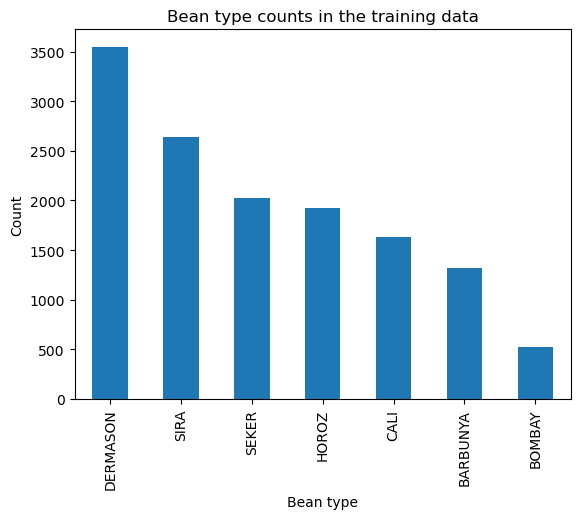

In [6]:
#lets visualise how many types of class are present
dry_beans["Class"].value_counts().plot(kind='bar',
                                   title= "Bean type counts in the training data",
                                   xlabel= 'Bean type',
                                   ylabel= 'Count');

In [7]:
dry_beans.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [8]:
#let us label class into digits for classifictaion purpose
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dry_beans.Class=le.fit_transform(dry_beans.Class)

In [9]:
dry_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [10]:
print(le.classes_)

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


from above we can observe that 0='BARBUNYA', 1='BOMBAY', 2='CALI', 3='DERMASON' and so on

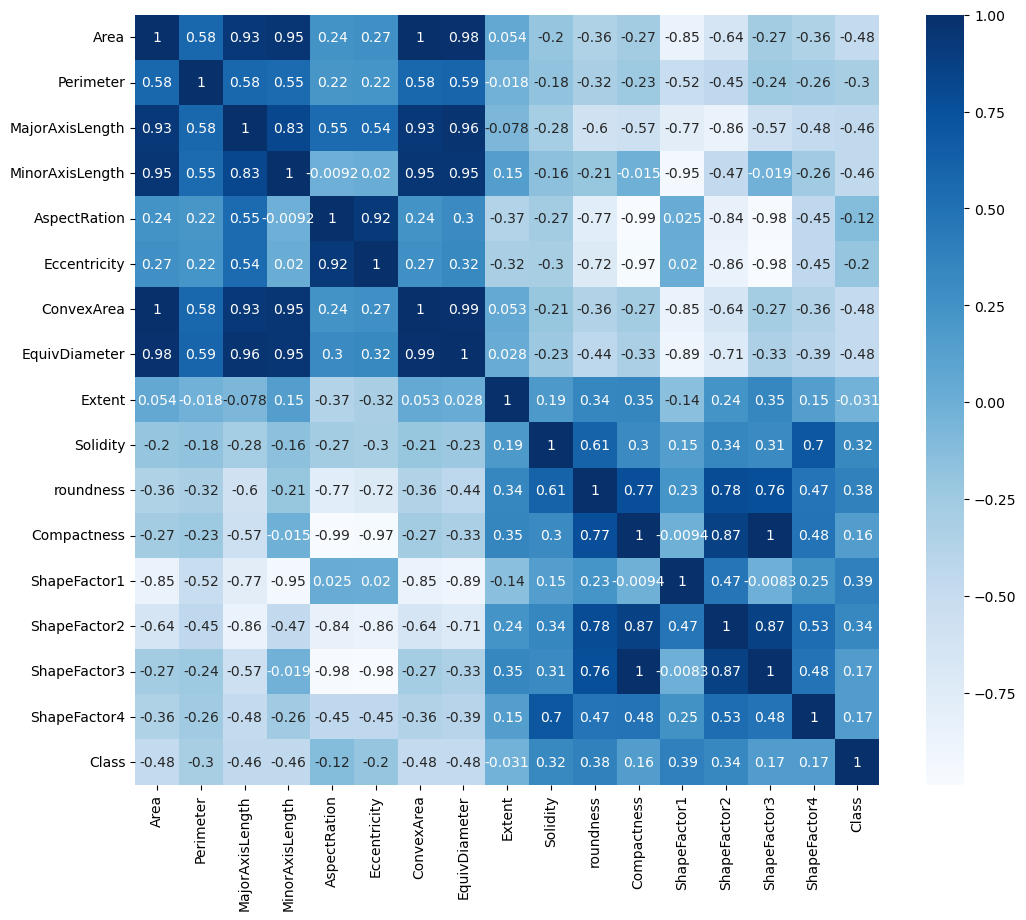

In [11]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(dry_beans.corr(), annot=True, cmap='Blues')
plt.show()

In [14]:
corr = dry_beans.corr().abs()
features = []
correlations = []
for idx, correlation in corr['Class'].T.iteritems():
    if correlation >= .30 and idx != 'Class':
        features.append(idx)
        correlations.append(correlation)
corr_class_df = pd.DataFrame(
    {'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [17]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame(
    {'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], 
                                                                                          ascending=False)

In [18]:
print('Correlations with Class')
display(corr_class_df)
print('Multicollinear Features')
display(MC_df)


Correlations with Class


,Correlations,Features
4,0.481099,EquivDiameter
3,0.477459,ConvexArea
0,0.475252,Area
2,0.458492,MinorAxisLength
1,0.455175,MajorAxisLength
7,0.391907,ShapeFactor1
6,0.384972,roundness
8,0.335122,ShapeFactor2
5,0.321283,Solidity


Multicollinear Features


,Correlations,Features
2,0.999939,"[Area, ConvexArea]"
23,0.999939,"[ConvexArea, Area]"
48,0.998686,"[ShapeFactor3, Compactness]"
36,0.998686,"[Compactness, ShapeFactor3]"
16,0.987687,"[AspectRation, Compactness]"
33,0.987687,"[Compactness, AspectRation]"
31,0.985226,"[EquivDiameter, ConvexArea]"
26,0.985226,"[ConvexArea, EquivDiameter]"
3,0.984968,"[Area, EquivDiameter]"
28,0.984968,"[EquivDiameter, Area]"


Almost all values have Multi collinearity with each other, but that is how it will be in classifying beans based on its shape. 

### Apply all classification Techniques

### SVM

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC

In [23]:
#let us split the data
X=dry_beans.drop(labels='Class', axis=1)
y=dry_beans['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
X_train.shape, X_test.shape

((10888, 16), (2723, 16))

### feature Scaling

In [27]:
#scaling using standard scaler

from sklearn.preprocessing import StandardScaler

stdscaler=StandardScaler()
X_train=stdscaler.fit_transform(X_train)
X_test=stdscaler.transform(X_test)

### SVM with RBF Kernel

In [28]:
svm_1=SVC(C=10,kernel='rbf', gamma=0.1)
svm_1.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [54]:
y_pred = svm_1.predict(X_test)
score1 = accuracy_score(y_test,y_pred)
print('Accuracy_score with RBF is : ',score1)

Accuracy_score with RBF is :  0.9419757620271759


In [31]:
print(confusion_matrix(y_test,y_pred))

[[256   0  11   1   0   2   5]
 [  0  94   0   0   0   0   0]
 [  7   0 295   0   2   0   2]
 [  0   0   0 653   0   6  39]
 [  1   0   3   0 373   0  10]
 [  3   0   0  10   0 396   5]
 [  3   0   1  66   8   4 467]]


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       275
           1       1.00      1.00      1.00        94
           2       0.95      0.96      0.96       306
           3       0.89      0.94      0.91       698
           4       0.97      0.96      0.97       387
           5       0.97      0.96      0.96       414
           6       0.88      0.85      0.87       549

    accuracy                           0.93      2723
   macro avg       0.95      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



Based on the classification report, the model appears to perform well overall with an overall accuracy of 93%.

### SVM with Linear Kernel

In [35]:
svm_2 = SVC(C=10,kernel='linear', gamma=0.1)
svm_2.fit(X_train,y_train)

SVC(C=10, gamma=0.1, kernel='linear')

In [55]:
y_pred = svm_2.predict(X_test)
score2 = accuracy_score(y_test,y_pred)
print('Accuracy_score with Linear is : ',score2)

Accuracy_score with Linear is :  0.9327947117150202


### SVM with Poly Kernel

In [37]:
svm_3 = SVC(C=10,kernel='poly', gamma=0.1)
svm_3.fit(X_train,y_train)

SVC(C=10, gamma=0.1, kernel='poly')

In [56]:
y_pred = svm_3.predict(X_test)
score3 = accuracy_score(y_test,y_pred)
print('Accuracy_score with Poly is : ',score3)

Accuracy_score with Poly is :  0.9375688578773411


# Logistic Regression (Classification)

In [41]:
X=dry_beans.drop(labels='Class', axis=1).values
y=dry_beans['Class'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10)

### feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

stdscalar=StandardScaler()

X_train=stdscalar.fit_transform(X_train)
X_test=stdscalar.transform(X_test)

### fitting to model

In [57]:
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
score4 = accuracy_score(y_test,y_pred)
print('Accuracy Score with Logistic Regression is : ',score4)

Accuracy Score with Logistic Regression is :  0.9272860815277267


In [46]:
print(confusion_matrix(y_test,y_pred))

[[234   0  17   0   0   2   9]
 [  0  97   0   0   0   0   0]
 [ 10   0 311   0   6   2   2]
 [  0   0   0 632   2   9  45]
 [  0   0   5   4 387   0   8]
 [  4   0   0   3   1 403  13]
 [  1   0   3  42   7   3 461]]


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       262
           1       1.00      1.00      1.00        97
           2       0.93      0.94      0.93       331
           3       0.93      0.92      0.92       688
           4       0.96      0.96      0.96       404
           5       0.96      0.95      0.96       424
           6       0.86      0.89      0.87       517

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



Based on the classification report, the model appears to perform well overall with an overall accuracy of 93%.

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred = dtree.predict(X_test)
score5 = accuracy_score(y_test,y_pred)

print('Accuracy Score of Decision Tree is : ',score5)

Accuracy Score of Decision Tree is :  0.89386705839148


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       262
           1       1.00      1.00      1.00        97
           2       0.90      0.88      0.89       331
           3       0.89      0.89      0.89       688
           4       0.93      0.94      0.93       404
           5       0.95      0.94      0.94       424
           6       0.82      0.83      0.82       517

    accuracy                           0.89      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.89      0.89      2723



Based on the classification report, the model appears to perform well overall with an overall accuracy of 89%.

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
y_pred = rf.predict(X_test)
score6 = accuracy_score(y_test,y_pred)

print('Accuracy Score of Random Forest is : ',score6)

Accuracy Score of Random Forest is :  0.9316929856775615


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       262
           1       1.00      1.00      1.00        97
           2       0.94      0.94      0.94       331
           3       0.91      0.93      0.92       688
           4       0.96      0.95      0.96       404
           5       0.96      0.97      0.96       424
           6       0.89      0.87      0.88       517

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



Based on the classification report, the model appears to perform well overall with an overall accuracy of 93%.

# Conclusion:

In [60]:
print('Accuracy_score with RBF is : ',score1 * 100)
print('Accuracy_score with Linear is : ',score2 * 100)
print('Accuracy_score with Poly is : ',score3 * 100)
print('Accuracy Score with Logistic Regression is : ',score4 * 100)
print('Accuracy Score of Decision Tree is : ',score5 * 100)
print('Accuracy Score of Random Forest is : ',score6 * 100)

Accuracy_score with RBF is :  94.1975762027176
Accuracy_score with Linear is :  93.27947117150201
Accuracy_score with Poly is :  93.7568857877341
Accuracy Score with Logistic Regression is :  92.72860815277268
Accuracy Score of Decision Tree is :  89.386705839148
Accuracy Score of Random Forest is :  93.16929856775616


From Above results we can confirm that Support Vector Machine with RBF Kernel gives good accuracy score compared to all other classification models.